# 16 - Splitting  a string into multiple columns

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame({'name':["Usman Ahmad","Ahmad Ali","Ali Ahmad","Nouman Ali"],
                  'location':["Gujranawala,pakistan","Lahore,Pakistan","Lahore,Pakistan","sailkot,Pakistan"]})

In [10]:
df

,name,location,first_name,last_name
0,Usman Ahmad,"Gujranawala,pakistan",Usman,Ahmad
1,Ahmad Ali,"Lahore,Pakistan",Ahmad,Ali
2,Ali Ahmad,"Lahore,Pakistan",Ali,Ahmad
3,Nouman Ali,"sailkot,Pakistan",Nouman,Ali


In [11]:
df.name.str.split(' ').head()

0    [Usman, Ahmad]
1      [Ahmad, Ali]
2      [Ali, Ahmad]
3     [Nouman, Ali]
Name: name, dtype: object

In [12]:
#spliting a column into columns
df.name.str.split(' ',expand=True)

,0,1
0,Usman,Ahmad
1,Ahmad,Ali
2,Ali,Ahmad
3,Nouman,Ali


In [13]:
df

,name,location,first_name,last_name
0,Usman Ahmad,"Gujranawala,pakistan",Usman,Ahmad
1,Ahmad Ali,"Lahore,Pakistan",Ahmad,Ali
2,Ali Ahmad,"Lahore,Pakistan",Ali,Ahmad
3,Nouman Ali,"sailkot,Pakistan",Nouman,Ali


In [14]:
#addind those split column into new columns
df[['first_name',"last_name"]]=df.name.str.split(' ',expand=True)

In [15]:
df

,name,location,first_name,last_name
0,Usman Ahmad,"Gujranawala,pakistan",Usman,Ahmad
1,Ahmad Ali,"Lahore,Pakistan",Ahmad,Ali
2,Ali Ahmad,"Lahore,Pakistan",Ali,Ahmad
3,Nouman Ali,"sailkot,Pakistan",Nouman,Ali


In [16]:
df[['city','country']]=df.location.str.split(',',expand=True)

In [17]:
df

,name,location,first_name,last_name,city,country
0,Usman Ahmad,"Gujranawala,pakistan",Usman,Ahmad,Gujranawala,pakistan
1,Ahmad Ali,"Lahore,Pakistan",Ahmad,Ali,Lahore,Pakistan
2,Ali Ahmad,"Lahore,Pakistan",Ali,Ahmad,Lahore,Pakistan
3,Nouman Ali,"sailkot,Pakistan",Nouman,Ali,sailkot,Pakistan


In [18]:
#define data manipulation
df=df[['first_name','last_name','city','country']]

In [19]:
df

,first_name,last_name,city,country
0,Usman,Ahmad,Gujranawala,pakistan
1,Ahmad,Ali,Lahore,Pakistan
2,Ali,Ahmad,Lahore,Pakistan
3,Nouman,Ali,sailkot,Pakistan


# 17 - Aggregate by multiple group/function

In [20]:
#libraries
import pandas as pd
import seaborn as sns

#import dataset
df = sns.load_dataset('titanic')

In [21]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
df.groupby('who').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [23]:
df.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [24]:
df.groupby('sex').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [25]:
df.groupby('who').sum()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
who,,,,,,,,
child,49,218,528.67,144,105,2721.2210,0,6
man,88,1274,13700.50,159,82,13352.0656,537,410
woman,205,565,6976.00,163,153,12620.6627,0,121


In [26]:
len(df.sex)

891

In [27]:
len(df.groupby('who'))

3

In [28]:
len(df.groupby('sex'))

2

In [29]:
len(df.groupby('fare'))

248

In [30]:
len(df.groupby('pclass'))

3

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
df.groupby(['sex','pclass','who']).count()

survived  age  sibsp  parch  fare  embarked  class  \
sex    pclass who                                                         
female 1      child         3    3      3      3     3         3      3   
              woman        91   82     91     91    91        89     91   
       2      child        10   10     10     10    10        10     10   
              woman        66   64     66     66    66        66     66   
       3      child        30   30     30     30    30        30     30   
              woman       114   72    114    114   114       114    114   
male   1      child         3    3      3      3     3         3      3   
              man         119   98    119    119   119       119    119   
       2      child         9    9      9      9     9         9      9   
              man          99   90     99     99    99        99     99   
       3      child        28   28     28     28    28        28     28   
              man         319  225    319    319   319       319    319   

                     adult_male  deck  embark_town  alive  alone  
sex    pclass who                                                 
female 1      child           3     3            3      3      3  
              woman          91    78           89     91     91  
       2      child          10     1           10     10     10  
              woman          66     9           66     66     66  
       3      child          30     2           30     30     30  
              woman         114     4          114    114    114  
male   1      child           3     3            3      3      3  
              man           119    91          119    119    119  
       2      child           9     3            9      9      9  
              man            99     3           99     99     99  
       3      child          28     1           28     28     28  
              man           319     5          319    319    319

In [33]:
df.groupby(['sex','pclass','adult_male']).count()

survived  age  sibsp  parch  fare  embarked  class  \
sex    pclass adult_male                                                       
female 1      False             94   85     94     94    94        92     94   
       2      False             76   74     76     76    76        76     76   
       3      False            144  102    144    144   144       144    144   
male   1      False              3    3      3      3     3         3      3   
              True             119   98    119    119   119       119    119   
       2      False              9    9      9      9     9         9      9   
              True              99   90     99     99    99        99     99   
       3      False             28   28     28     28    28        28     28   
              True             319  225    319    319   319       319    319   

                          who  deck  embark_town  alive  alone  
sex    pclass adult_male                                        
female 1      False        94    81           92     94     94  
       2      False        76    10           76     76     76  
       3      False       144     6          144    144    144  
male   1      False         3     3            3      3      3  
              True        119    91          119    119    119  
       2      False         9     3            9      9      9  
              True         99     3           99     99     99  
       3      False        28     1           28     28     28  
              True        319     5          319    319    319

In [35]:
df.groupby(['sex','pclass','embarked']).count()

survived  age  sibsp  parch  fare  class  who  \
sex    pclass embarked                                                  
female 1      C               43   38     43     43    43     43   43   
              Q                1    1      1      1     1      1    1   
              S               48   44     48     48    48     48   48   
       2      C                7    7      7      7     7      7    7   
              Q                2    1      2      2     2      2    2   
              S               67   66     67     67    67     67   67   
       3      C               23   16     23     23    23     23   23   
              Q               33   10     33     33    33     33   33   
              S               88   76     88     88    88     88   88   
male   1      C               42   36     42     42    42     42   42   
              Q                1    1      1      1     1      1    1   
              S               79   64     79     79    79     79   79   
       2      C               10    8     10     10    10     10   10   
              Q                1    1      1      1     1      1    1   
              S               97   90     97     97    97     97   97   
       3      C               43   25     43     43    43     43   43   
              Q               39   14     39     39    39     39   39   
              S              265  214    265    265   265    265  265   

                        adult_male  deck  embark_town  alive  alone  
sex    pclass embarked                                               
female 1      C                 43    35           43     43     43  
              Q                  1     1            1      1      1  
              S                 48    43           48     48     48  
       2      C                  7     1            7      7      7  
              Q                  2     1            2      2      2  
              S                 67     8           67     67     67  
       3      C                 23     1           23     23     23  
              Q                 33     0           33     33     33  
              S                 88     5           88     88     88  
male   1      C                 42    31           42     42     42  
              Q                  1     1            1      1      1  
              S                 79    62           79     79     79  
       2      C                 10     1           10     10     10  
              Q                  1     0            1      1      1  
              S                 97     5           97     97     97  
       3      C                 43     0           43     43     43  
              Q                 39     1           39     39     39  
              S                265     5          265    265    265

# 18 - select specific rows and column

In [36]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [37]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
#select column
df[['sex','class']]

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third
...,...,...
886,male,Second
887,female,First
888,female,Third
889,male,First


In [39]:
#select column
df[['sex','class','deck']]

,sex,class,deck
0,male,Third,NaN
1,female,First,C
2,female,Third,NaN
3,female,First,C
4,male,Third,NaN
...,...,...,...
886,male,Second,NaN
887,female,First,B
888,female,Third,NaN
889,male,First,C


In [40]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df.describe().loc[['min','25%','50%','75%','max']]

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [42]:
#or 
df.describe().loc['min':'max']

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [43]:
df.describe().loc['mean':'max']

,survived,pclass,age,sibsp,parch,fare
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df.describe().loc['min':'max',:]

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [45]:
df.describe().loc['min':'max','survived']

min    0.0
25%    0.0
50%    0.0
75%    1.0
max    1.0
Name: survived, dtype: float64

In [46]:
df.describe().loc['min':'max','survived':'age']

,survived,pclass,age
min,0.0,1.0,0.420
25%,0.0,2.0,20.125
50%,0.0,3.0,28.000
75%,1.0,3.0,38.000
max,1.0,3.0,80.000


In [47]:
df.describe().loc['min':'max',['survived','age']]

,survived,age
min,0.0,0.420
25%,0.0,20.125
50%,0.0,28.000
75%,1.0,38.000
max,1.0,80.000


# 19 - Reshape multiindex series

In [48]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
df.survived.mean()

0.3838383838383838

In [50]:
df.groupby('sex').survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [51]:
df.groupby(['sex','pclass']).survived.mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [52]:
df.groupby(['sex','class']).survived.mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [53]:
df.groupby(['sex','class']).survived.mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# 20 - Continuous to catogirical data conversion

In [54]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
df.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [56]:
#creating bins
pd.cut(df.age,bins=[0,18,25,99],labels=['child','young_adult','adult']).head()

0    young_adult
1          adult
2          adult
3          adult
4          adult
Name: age, dtype: category
Categories (3, object): ['child' < 'young_adult' < 'adult']

In [57]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [58]:
df['new_age']=pd.cut(df.age,bins=[0,18,25,99],labels=['child','young_adult','adult']).head()

In [59]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


# 21 - convert one set of values into anotherone 

In [60]:
df.sex.head() 

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [61]:
df.sex.map({'male':0,'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64

In [62]:
df['sex_num']=df.sex.map({'male':0,'female':1})

In [63]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_adult,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,0


In [64]:
df.embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: object

In [65]:
df.embarked.count()

889

In [66]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [67]:
df.embarked.factorize()[0]

array([ 0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  1,  0,  0,  2,  0,  0,  0,  1,  0,  2,  0,  1,  1,  2,  0,
        1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  2,  0,  2,  2,  1,  0,  0,
        0,  1,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  1,  0,  2,  0,  1,
        0,  0,  0,  1,  0,  0,  1,  2,  0,  1,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,
        0,  2,  0,  0,  0,  0,  0,  1,  1,  2,  0,  2,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  2,  1,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0

In [69]:
df['embarked_num']= df.embarked.factorize()[0]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_num,embarked_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_adult,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,0,0


In [70]:
df.head(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_num,embarked_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_adult,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,0,0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN,0,2
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,NaN,0,0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,NaN,0,0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,NaN,1,0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,NaN,1,1


# 22 - transpose a wide dataframe

In [71]:
import numpy  as np
import pandas as pd

In [73]:
#creating a new df
df = pd.DataFrame(np.random.rand(200,25),columns=list('abcdefghijklmnopqrstuvwxy'))

In [74]:
df.head()

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
0,0.126498,0.629982,0.793852,0.926084,0.491041,0.166140,0.247621,0.008606,0.859233,0.520622,...,0.737086,0.535612,0.715115,0.825642,0.310726,0.448416,0.641501,0.827307,0.890956,0.666279
1,0.864940,0.725498,0.816447,0.366769,0.940614,0.366932,0.699339,0.821337,0.698847,0.336151,...,0.024034,0.757938,0.959357,0.356812,0.347654,0.594884,0.037056,0.816127,0.881211,0.413661
2,0.095145,0.042430,0.118834,0.855103,0.482726,0.060539,0.977909,0.141117,0.711459,0.826477,...,0.034656,0.784793,0.566696,0.467065,0.452482,0.126749,0.277388,0.614097,0.211341,0.257393
3,0.528256,0.152455,0.518174,0.311832,0.985523,0.025195,0.632812,0.429235,0.797060,0.574121,...,0.636140,0.967217,0.170498,0.049590,0.559724,0.724788,0.501995,0.608592,0.026437,0.901648
4,0.643329,0.319541,0.867955,0.224324,0.962869,0.762431,0.617221,0.422733,0.646814,0.631973,...,0.313920,0.314142,0.837757,0.226281,0.435875,0.800495,0.946715,0.853649,0.025704,0.104714


In [75]:
df.head(10)

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
0,0.126498,0.629982,0.793852,0.926084,0.491041,0.166140,0.247621,0.008606,0.859233,0.520622,...,0.737086,0.535612,0.715115,0.825642,0.310726,0.448416,0.641501,0.827307,0.890956,0.666279
1,0.864940,0.725498,0.816447,0.366769,0.940614,0.366932,0.699339,0.821337,0.698847,0.336151,...,0.024034,0.757938,0.959357,0.356812,0.347654,0.594884,0.037056,0.816127,0.881211,0.413661
2,0.095145,0.042430,0.118834,0.855103,0.482726,0.060539,0.977909,0.141117,0.711459,0.826477,...,0.034656,0.784793,0.566696,0.467065,0.452482,0.126749,0.277388,0.614097,0.211341,0.257393
3,0.528256,0.152455,0.518174,0.311832,0.985523,0.025195,0.632812,0.429235,0.797060,0.574121,...,0.636140,0.967217,0.170498,0.049590,0.559724,0.724788,0.501995,0.608592,0.026437,0.901648
4,0.643329,0.319541,0.867955,0.224324,0.962869,0.762431,0.617221,0.422733,0.646814,0.631973,...,0.313920,0.314142,0.837757,0.226281,0.435875,0.800495,0.946715,0.853649,0.025704,0.104714
5,0.206287,0.945750,0.471932,0.314351,0.696939,0.739876,0.722953,0.732834,0.377113,0.772852,...,0.383208,0.148104,0.501598,0.539276,0.714042,0.739222,0.366674,0.428144,0.176828,0.731095
6,0.290356,0.721970,0.676520,0.694926,0.245682,0.584652,0.552985,0.916842,0.247690,0.198072,...,0.043652,0.861065,0.867194,0.090456,0.628037,0.971597,0.585638,0.606401,0.658406,0.369681
7,0.430205,0.771801,0.806721,0.318862,0.521279,0.299747,0.694224,0.335397,0.730308,0.034604,...,0.801646,0.574226,0.750237,0.297835,0.336749,0.505057,0.335230,0.044016,0.912749,0.622968
8,0.107521,0.735302,0.009351,0.565330,0.224584,0.808578,0.803252,0.112551,0.536188,0.182168,...,0.032662,0.692269,0.841315,0.614561,0.646436,0.533714,0.268889,0.088246,0.894894,0.751817
9,0.073351,0.303995,0.966640,0.340086,0.794708,0.500440,0.040634,0.638687,0.958861,0.805673,...,0.445079,0.018490,0.364189,0.030841,0.404170,0.041246,0.111439,0.103880,0.481549,0.660175


In [76]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
a,0.126498,0.864940,0.095145,0.528256,0.643329,0.206287,0.290356,0.430205,0.107521,0.073351
b,0.629982,0.725498,0.042430,0.152455,0.319541,0.945750,0.721970,0.771801,0.735302,0.303995
c,0.793852,0.816447,0.118834,0.518174,0.867955,0.471932,0.676520,0.806721,0.009351,0.966640
d,0.926084,0.366769,0.855103,0.311832,0.224324,0.314351,0.694926,0.318862,0.565330,0.340086
e,0.491041,0.940614,0.482726,0.985523,0.962869,0.696939,0.245682,0.521279,0.224584,0.794708
f,0.166140,0.366932,0.060539,0.025195,0.762431,0.739876,0.584652,0.299747,0.808578,0.500440
g,0.247621,0.699339,0.977909,0.632812,0.617221,0.722953,0.552985,0.694224,0.803252,0.040634
h,0.008606,0.821337,0.141117,0.429235,0.422733,0.732834,0.916842,0.335397,0.112551,0.638687
i,0.859233,0.698847,0.711459,0.797060,0.646814,0.377113,0.247690,0.730308,0.536188,0.958861
j,0.520622,0.336151,0.826477,0.574121,0.631973,0.772852,0.198072,0.034604,0.182168,0.805673


In [77]:
df.describe()

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.490880,0.545478,0.509582,0.473629,0.487876,0.506859,0.482436,0.525145,0.516822,0.469276,...,0.471628,0.473404,0.522483,0.488084,0.497333,0.440042,0.518057,0.494094,0.523954,0.511632
std,0.289116,0.290229,0.296042,0.297213,0.286405,0.278197,0.287537,0.296216,0.289710,0.282464,...,0.287649,0.286334,0.284331,0.294833,0.279243,0.282863,0.291707,0.275289,0.294186,0.287500
min,0.001967,0.002832,0.001368,0.000130,0.003897,0.004285,0.006426,0.001555,0.006875,0.001248,...,0.001459,0.003713,0.000159,0.000775,0.005607,0.001396,0.006105,0.004816,0.003962,0.010287
25%,0.258191,0.313818,0.233699,0.200534,0.245215,0.284609,0.221282,0.271488,0.288259,0.246984,...,0.244147,0.217652,0.267886,0.242882,0.258108,0.183440,0.277245,0.271369,0.290198,0.268091
50%,0.463419,0.573941,0.545077,0.432917,0.474986,0.522150,0.500314,0.555177,0.528429,0.451483,...,0.446493,0.462621,0.512851,0.485817,0.494732,0.428865,0.556029,0.468076,0.523672,0.518095
75%,0.749310,0.786221,0.775434,0.738203,0.735133,0.737059,0.719288,0.784818,0.767845,0.701328,...,0.736459,0.728606,0.766827,0.752679,0.726582,0.656693,0.752613,0.728061,0.790627,0.752018
max,0.999176,0.998774,0.988194,0.998682,0.985523,0.997158,0.996484,0.996756,0.996610,0.999257,...,0.994794,0.991305,0.980332,0.994783,0.992589,0.993504,0.999804,0.983903,0.997958,0.999838


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a,200.0,0.490880,0.289116,0.001967,0.258191,0.463419,0.749310,0.999176
b,200.0,0.545478,0.290229,0.002832,0.313818,0.573941,0.786221,0.998774
c,200.0,0.509582,0.296042,0.001368,0.233699,0.545077,0.775434,0.988194
d,200.0,0.473629,0.297213,0.000130,0.200534,0.432917,0.738203,0.998682
e,200.0,0.487876,0.286405,0.003897,0.245215,0.474986,0.735133,0.985523
f,200.0,0.506859,0.278197,0.004285,0.284609,0.522150,0.737059,0.997158
g,200.0,0.482436,0.287537,0.006426,0.221282,0.500314,0.719288,0.996484
h,200.0,0.525145,0.296216,0.001555,0.271488,0.555177,0.784818,0.996756
i,200.0,0.516822,0.289710,0.006875,0.288259,0.528429,0.767845,0.996610
j,200.0,0.469276,0.282464,0.001248,0.246984,0.451483,0.701328,0.999257


# 23 - Reshaping a dataframe

In [79]:
fasla=pd.DataFrame([['12345',100,200,300],['34567',400,500,600],['67890',700,800,900]],
                  columns=['zip','factory','warehouse','retail'])

In [80]:
fasla.head()

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


In [81]:
fasla2=pd.DataFrame([[1,'12345','factory'],[2,'34567','warehouse']],
                   columns=['user_id','zip','location_type'])

In [82]:
fasla2.head()

,user_id,zip,location_type
0,1,12345,factory
1,2,34567,warehouse


In [84]:
fasla.melt(id_vars='zip',var_name='location_type',value_name='distance')

,zip,location_type,distance
0,12345,factory,100
1,34567,factory,400
2,67890,factory,700
3,12345,warehouse,200
4,34567,warehouse,500
5,67890,warehouse,800
6,12345,retail,300
7,34567,retail,600
8,67890,retail,900


In [85]:
fasla.head()

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


<AxesSubplot:xlabel='zip', ylabel='factory'>

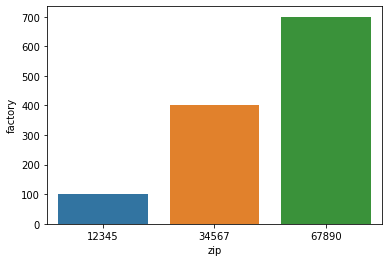

In [86]:
sns.barplot(x='zip',y='factory',data=fasla)

In [87]:
fasla_long=fasla.melt(id_vars='zip',var_name='location_type',value_name='distance')

In [90]:
fasla_long.head()

,zip,location_type,distance
0,12345,factory,100
1,34567,factory,400
2,67890,factory,700
3,12345,warehouse,200
4,34567,warehouse,500


In [92]:
fasla_long.dtypes

zip              object
location_type    object
distance          int64
dtype: object

<AxesSubplot:xlabel='zip', ylabel='distance'>

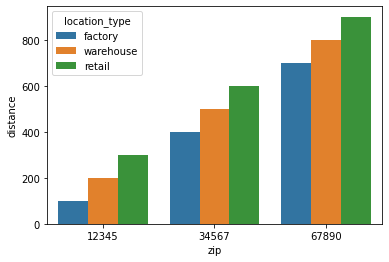

In [94]:
import seaborn as sns
sns.barplot(x='zip',y='distance',hue='location_type',data=fasla_long)